In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from pickle import dump

from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import OneHotEncoder


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
# from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error, r2_score


from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


from sklearn.linear_model import LinearRegression

In [20]:
df = pd.read_pickle('data/customer_data_modified.pkl')

In [21]:
input_num_variables = ['net_salary', 'other_income', 'housing_spend', 'credit_score', 'savings_bal_lbg', 'age']
# input_cat_variables = ['gender', 'ethnicity_group', 'geo_region']
input_cat_variables = ['gender_cat', 'ethnicity_group_cat', 'geo_region_cat']
all_input_variables = input_num_variables + input_cat_variables
target_var = 'annual_net_savings_lbg'

In [22]:
df = df[df.annual_net_savings_lbg !=0]

In [23]:
X = df[all_input_variables]
y = df[target_var]
print(X.shape, y.shape)

(4368, 9) (4368,)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
scale_minmax = MinMaxScaler().set_output(transform='pandas')
X_train_num = X_train[input_num_variables]
X_test_num = X_test[input_num_variables]
X_train_num_scaled = scale_minmax.fit_transform(X_train_num)
X_test_num_scaled = scale_minmax.transform(X_test_num)


# X_train_num_scaled = np.log(X_train[input_num_variables]+1)
# X_test_num_scaled = np.log(X_test[input_num_variables]+1)

In [26]:
X_train_num_scaled.describe()

,net_salary,other_income,housing_spend,credit_score,savings_bal_lbg,age
count,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000
mean,10.933395,8.652229,10.081622,7.268236,11.378372,3.704098
std,0.162685,2.760487,0.190033,1.263649,4.864766,0.367564
min,10.402372,0.000000,9.266207,0.000000,0.000000,2.944439
25%,10.821528,9.175057,9.963395,7.401045,11.989668,3.433987
50%,10.932582,9.405735,10.093137,7.482175,13.466313,3.761200
75%,11.060217,9.819842,10.234052,7.582493,14.123881,4.025352
max,11.487472,10.200029,10.642410,7.833216,14.965733,4.234107


In [27]:
df_train_scaled = pd.concat([X_train_num_scaled, X_train[input_cat_variables]], axis=1, join='inner')

In [28]:
df_train_scaled

,net_salary,other_income,housing_spend,credit_score,savings_bal_lbg,age,gender_cat,ethnicity_group_cat,geo_region_cat
2306,11.174164,9.849121,10.322273,7.629548,14.405017,4.043051,2,3,3
15534,11.035381,9.815375,10.215925,7.574954,0.000000,3.135494,1,3,3
16985,10.803411,9.230268,9.865374,7.442739,13.851142,3.970292,1,3,0
18241,10.814224,9.528422,9.963669,7.457465,14.006095,4.025352,2,4,1
24488,10.549740,0.000000,9.518287,7.207815,13.366664,3.988984,1,2,2
...,...,...,...,...,...,...,...,...,...
23786,10.852383,9.399078,9.898142,7.458002,13.905015,3.951244,1,3,4
3185,10.944675,9.408067,9.925977,7.514233,14.218467,4.060443,2,3,4
21161,10.853592,9.276619,9.873638,7.466433,14.207285,4.127134,1,3,1
26059,11.093505,9.817683,10.329794,7.589139,0.000000,3.218876,2,3,3


In [29]:
df_test_scaled = pd.concat([X_test_num_scaled, X_test[input_cat_variables]], axis=1, join='inner')

In [30]:
df_test_scaled

,net_salary,other_income,housing_spend,credit_score,savings_bal_lbg,age,gender_cat,ethnicity_group_cat,geo_region_cat
9310,10.867115,9.055907,10.002312,7.424470,11.640730,3.367296,2,3,5
15544,11.097055,10.057843,10.148085,0.000000,14.671249,4.158883,1,3,3
23290,11.033516,9.926139,10.176531,0.000000,14.195774,3.970292,1,3,3
7334,10.827001,9.366897,10.148952,7.406863,0.000000,3.044522,2,3,4
12139,10.892690,9.083621,9.962981,7.463713,14.246012,4.174387,1,3,4
...,...,...,...,...,...,...,...,...,...
20130,10.684021,0.000000,9.734122,7.289119,0.000000,3.218876,2,2,0
22994,10.903570,9.474635,10.001400,0.000000,14.389943,4.204693,2,3,0
4165,10.804829,9.297547,9.880156,7.421225,14.090380,4.094345,1,3,2
3898,11.126791,9.872664,10.302412,0.000000,14.064090,3.891820,2,3,3


In [31]:
df_test_scaled.describe()

,net_salary,other_income,housing_spend,credit_score,savings_bal_lbg,age,gender_cat,ethnicity_group_cat,geo_region_cat
count,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000
mean,10.934673,8.442830,10.080594,7.189312,11.114820,3.700098,1.515257,2.848128,2.463939
std,0.171728,3.051355,0.194649,1.465136,5.184662,0.377525,0.548902,0.587718,1.136312
min,10.458702,0.000000,9.427455,0.000000,0.000000,2.944439,0.000000,0.000000,0.000000
25%,10.820277,9.177525,9.959270,7.394132,11.976698,3.401197,1.000000,3.000000,2.000000
50%,10.933211,9.403323,10.092165,7.477890,13.458738,3.761200,2.000000,3.000000,3.000000
75%,11.073088,9.830098,10.234796,7.591314,14.129609,4.025352,2.000000,3.000000,3.000000
max,11.555746,10.188088,10.614560,7.906024,15.028019,4.234107,3.000000,4.000000,5.000000


In [32]:
df_train_scaled.describe()

,net_salary,other_income,housing_spend,credit_score,savings_bal_lbg,age,gender_cat,ethnicity_group_cat,geo_region_cat
count,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000
mean,10.933395,8.652229,10.081622,7.268236,11.378372,3.704098,1.491456,2.869446,2.472659
std,0.162685,2.760487,0.190033,1.263649,4.864766,0.367564,0.562439,0.606554,1.153414
min,10.402372,0.000000,9.266207,0.000000,0.000000,2.944439,0.000000,0.000000,0.000000
25%,10.821528,9.175057,9.963395,7.401045,11.989668,3.433987,1.000000,3.000000,2.000000
50%,10.932582,9.405735,10.093137,7.482175,13.466313,3.761200,1.000000,3.000000,3.000000
75%,11.060217,9.819842,10.234052,7.582493,14.123881,4.025352,2.000000,3.000000,3.000000
max,11.487472,10.200029,10.642410,7.833216,14.965733,4.234107,3.000000,4.000000,5.000000


In [33]:
# linear regression
lr = LinearRegression()
lr.fit(df_train_scaled, y_train)
y_pred = lr.predict(df_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse)
print(r2)

9866897.470467582
0.7778496372957897


In [34]:
df_result = pd.DataFrame({'true': list(y_test), 'pred': list(y_pred)})

In [35]:
df_result[df_result.true != 0.0]

,true,pred
0,15374.60,18942.978292
1,28115.25,32471.730963
2,32622.52,28783.065368
3,14536.37,15430.383271
4,30945.98,29423.041556
...,...,...
1437,16881.82,13699.807362
1438,30736.12,29118.802852
1439,28320.15,26939.485855
1440,30762.10,28904.883905


<Figure size 640x480 with 0 Axes>

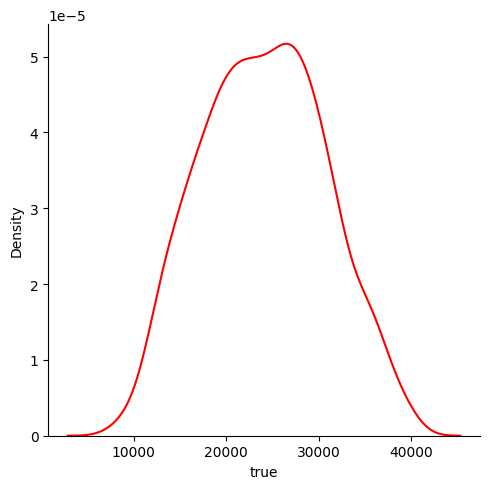

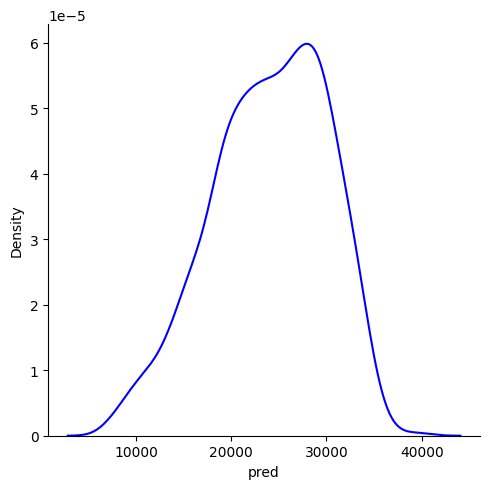

In [36]:
plt.figure()
sns.displot(df_result['true'], kind='kde', color='r', label='acutal')
sns.displot(df_result['pred'], kind='kde', color='b', label='pred')
plt.show()

In [37]:
# for col in input_num_variables:
#     plt.figure(figsize=(12,8))
#     plt.subplot(121)
#     plt.hist(df[col], density=False, alpha=0.5, label=col,histtype='step', stacked=True, color='black', log=False, bins='auto')
#     plt.legend()
#     plt.subplot(122)
#     plt.hist(np.log(df[col]+1), density=False, alpha=0.5, label=col,histtype='step', stacked=True, color='blue', log=False, bins='auto')
#     plt.legend()